<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cardonasebastian/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


###**Actividad Semanal -- 7 Regresiones y K means**
Maestría en Inteligencia Artificial Aplicada

Tecnológico de Monterrey

Materia: Ciencia y Analítica de Datos

**Profesor Titular:**
- María de la Paz Rico Fernández

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de la estudiante:**
- Fernando Sebastian Sanchez Cardona

**Matricula:**
- A01687530

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [103]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [104]:
##librerias de importacion
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore')


In [105]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [106]:
np.random.rand(100, 1)

array([[0.06576777],
       [0.94490869],
       [0.61911642],
       [0.73123414],
       [0.67658337],
       [0.66774998],
       [0.01726099],
       [0.52537128],
       [0.82171023],
       [0.04451885],
       [0.95616568],
       [0.42415968],
       [0.28989549],
       [0.53182136],
       [0.80121419],
       [0.47475506],
       [0.64510568],
       [0.49991439],
       [0.63127226],
       [0.13803092],
       [0.03866339],
       [0.13690141],
       [0.28583814],
       [0.25335606],
       [0.61517535],
       [0.45588942],
       [0.03881198],
       [0.03486591],
       [0.090588  ],
       [0.35308116],
       [0.00618295],
       [0.49398727],
       [0.36066966],
       [0.5554413 ],
       [0.72082523],
       [0.25097282],
       [0.15708365],
       [0.27805356],
       [0.00176318],
       [0.12001296],
       [0.75083036],
       [0.22280684],
       [0.99429963],
       [0.16783152],
       [0.78877172],
       [0.70504447],
       [0.32213214],
       [0.330

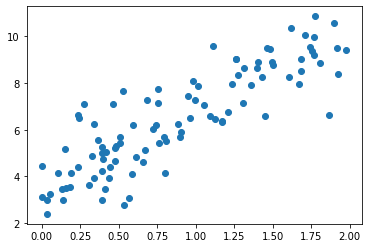

In [107]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [108]:
import pandas as pd
pd.DataFrame(y)

,0
0,4.225330
1,7.924391
2,4.420283
3,3.125596
4,6.609816
...,...
95,6.014637
96,5.558326
97,8.392838
98,8.246662


In [109]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

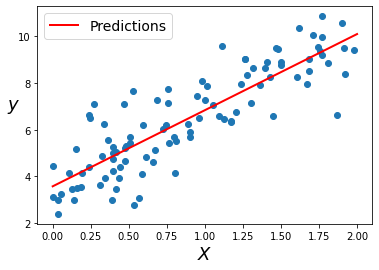

In [110]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [111]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [112]:
X_new.shape

(2, 1)

In [113]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.57091269],
       [10.10248231]])

In [114]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.26578481]]), array([3.57091269]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [115]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [116]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

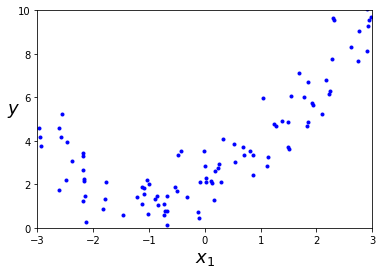

In [117]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [118]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.267328
1,2.742951
2,3.542188
3,4.572150
4,0.286026
...,...
95,3.545457
96,2.174626
97,5.729189
98,7.782052


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [119]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [120]:
X_poly

array([[ 1.12304216e+00,  1.26122368e+00],
       [ 2.36548026e-01,  5.59549687e-02],
       [-9.85239423e-03,  9.70696721e-05],
       [-2.61177482e+00,  6.82136770e+00],
       [-2.13421559e+00,  4.55487617e+00],
       [ 2.29834638e+00,  5.28239606e+00],
       [-5.39014110e-01,  2.90536211e-01],
       [ 6.85994860e-01,  4.70588947e-01],
       [ 1.69399396e-01,  2.86961555e-02],
       [-7.26705723e-01,  5.28101207e-01],
       [-6.73100744e-01,  4.53064612e-01],
       [ 3.32790035e-01,  1.10749208e-01],
       [-2.15314919e+00,  4.63605144e+00],
       [-6.76445758e-01,  4.57578864e-01],
       [-3.18146584e-01,  1.01217249e-01],
       [ 2.91075734e+00,  8.47250830e+00],
       [-8.91271384e-01,  7.94364680e-01],
       [ 8.67473375e-01,  7.52510057e-01],
       [-2.17550700e+00,  4.73283071e+00],
       [-2.60711171e+00,  6.79703146e+00],
       [ 2.22925208e+00,  4.96956485e+00],
       [ 1.38440941e+00,  1.91658943e+00],
       [-1.09500427e+00,  1.19903436e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [121]:
print(X[0])
print(X[0]*X[0])


[1.12304216]
[1.26122368]


In [122]:
X_poly[0]

array([1.12304216, 1.26122368])

Fit the model to this extended training data:

In [123]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.02467533, 0.55670524]]), array([1.98217591]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

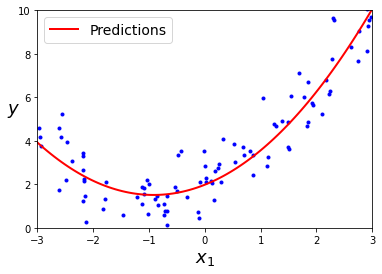

In [124]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [125]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
294,3.756673,47.823661
682,5.087086,38.588554
233,3.479439,48.381281
601,4.797410,42.534884
124,2.957189,54.247900
973,7.169644,25.311833
590,4.735663,32.574798
374,4.077251,36.072628
367,4.042397,45.249888
907,6.196250,34.488800


##### Divide los datos del costo de manufactura. Utiliza la función train_test_split

In [126]:
## utilizando la funcion train_test_split
from pandas.core.common import random_state

X = df[['Number of Units']]
y = df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=30)


print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


X_train.shape: (700, 1)
y_train.shape: (700,)
X_test.shape: (300, 1)
y_test.shape: (300,)


In [127]:
len(X)

1000

In [128]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

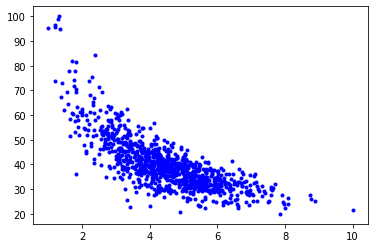

In [129]:
plt.plot(X,y,'b.')

##Regresion Lineal

#####Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [130]:
#declarando variables que mas adelante se ocuparan.
nombres, scores_r2, scores_mae = [], [], []

In [131]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train,y_train)
y_hat_train = lr_regressor.predict(X_train)
y_hat_test = lr_regressor.predict(X_test)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train),r2_score(y_test, y_hat_test))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train),mean_squared_error(y_test,y_hat_test))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train),mean_absolute_error(y_test,y_hat_test))
)

nombres.append('Linear Regression')
scores_r2.append([
    r2_score(y_train, y_hat_train),
    r2_score(y_test, y_hat_test),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train),
    mean_absolute_error(y_test, y_hat_test),
])

R2 	= 	Train: 0.5844	Test: 0.5664
MSE 	= 	Train: 45.9719	Test: 50.1449
MAE 	= 	Train: 4.9660	Test: 4.8379


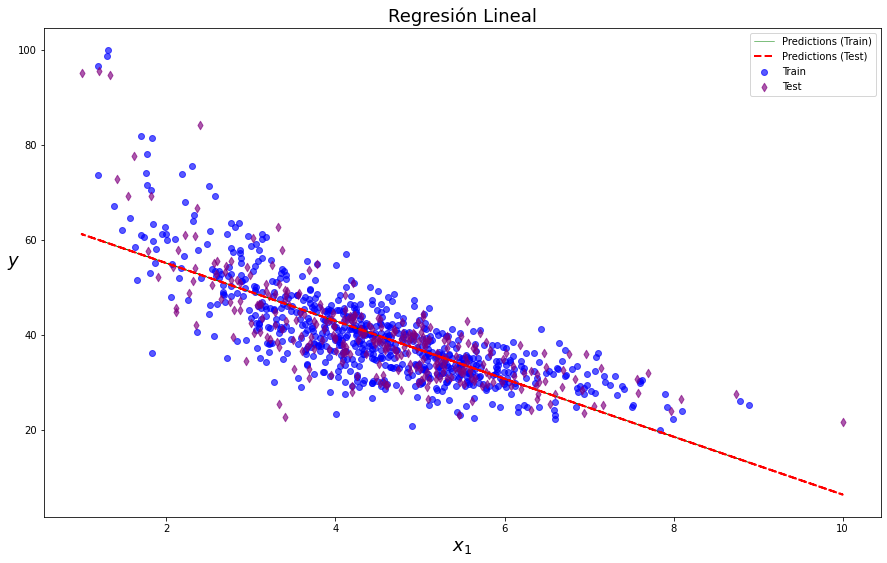

In [132]:
## Graficando la regresion Lineal con plt.
plt.figure (figsize=(15, 9))
plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.65, marker='o')
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.65, marker='d')
plt.plot(X_train, y_hat_train, color='green', label='Predictions (Train)', linewidth=0.5, linestyle='solid')
plt.plot(X_test, y_hat_test, color='red', label='Predictions (Test)', linewidth=2, linestyle='dashed')
plt. legend()

plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Lineal", fontsize=18)
plt. show()

##Regresion Polinomial

##### Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [133]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
poly_features.fit(X_train)

X_train_poly = poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_hat_train_poly = lr_poly.predict(X_train_poly)
y_hat_test_poly = lr_poly.predict(X_test_poly)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train_poly), r2_score(y_test, y_hat_test_poly))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train_poly), mean_squared_error(y_test,y_hat_test_poly))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train_poly), mean_absolute_error(y_test,y_hat_test_poly))
)

nombres.append('PolynomialFeatures')
scores_r2.append([
    r2_score(y_train, y_hat_train_poly),
    r2_score(y_test, y_hat_test_poly),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_poly),
    mean_absolute_error(y_test, y_hat_test_poly),
])

R2 	= 	Train: 0.6816	Test: 0.7152
MSE 	= 	Train: 35.2207	Test: 32.9418
MAE 	= 	Train: 4.5121	Test: 4.2691


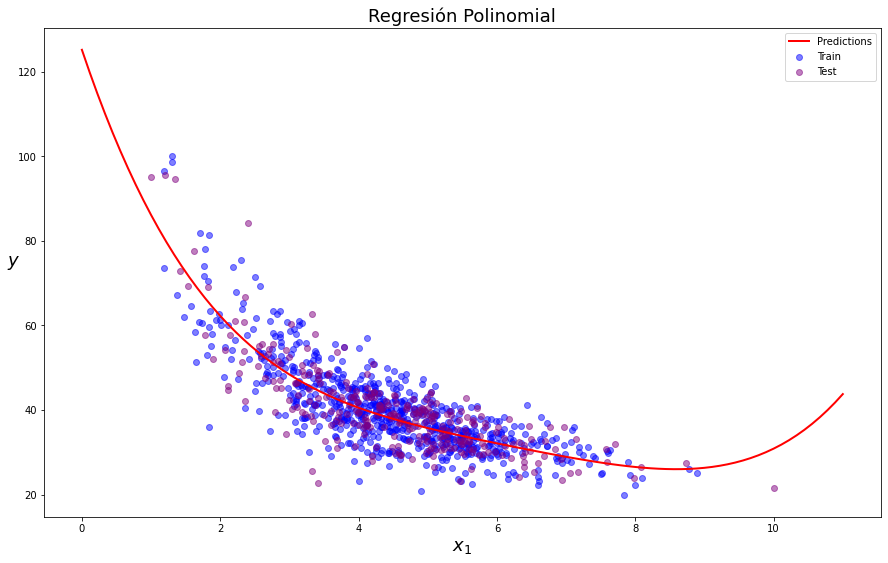

In [134]:
## se grafica la regresion polinomial
X_new = np.linspace(0, 11, 100) .reshape (100, 1)
X_new_poly=poly_features.transform(X_new)
y_new = lr_poly.predict(X_new_poly)

plt.figure (figsize=(15, 9))
plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.5)
plt.plot(X_new, y_new, color='red', label='Predictions', linewidth=2)

plt. legend()

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Polinomial", fontsize=18)
plt.show()

## Ridge

##### Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [135]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid={
      'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'solver': ['auto', 'svd', 'cholesky', 'lsar', 'sparse_cg', 'sag', 'saga'],
      'positive': [True, False]
    },
    cv=5, 
    n_jobs=-1,
)

res = grid.fit(X_train, y_train)
print ("Best params:", res.best_params_)
print ("Best score:", res.best_score_)

Best params: {'alpha': 10, 'positive': False, 'solver': 'saga'}
Best score: 0.5817464239936376


In [136]:
ridge_model = Ridge(alpha=10, solver='sag', positive=False)
ridge_model.fit(X_train, y_train)

y_hat_train_ridge = ridge_model.predict(X_train)
y_hat_test_ridge = ridge_model.predict(X_test)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train_ridge), r2_score(y_test, y_hat_test_ridge))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train_ridge), mean_squared_error(y_test,y_hat_test_ridge))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train_ridge), mean_absolute_error(y_test,y_hat_test_ridge))
)

nombres.append('Ridge')
scores_r2.append([
    r2_score(y_train, y_hat_train_ridge),
    r2_score(y_test, y_hat_test_ridge),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_ridge),
    mean_absolute_error(y_test, y_hat_test_ridge),
])

R2 	= 	Train: 0.5844	Test: 0.5667
MSE 	= 	Train: 45.9754	Test: 50.1176
MAE 	= 	Train: 4.9614	Test: 4.8309


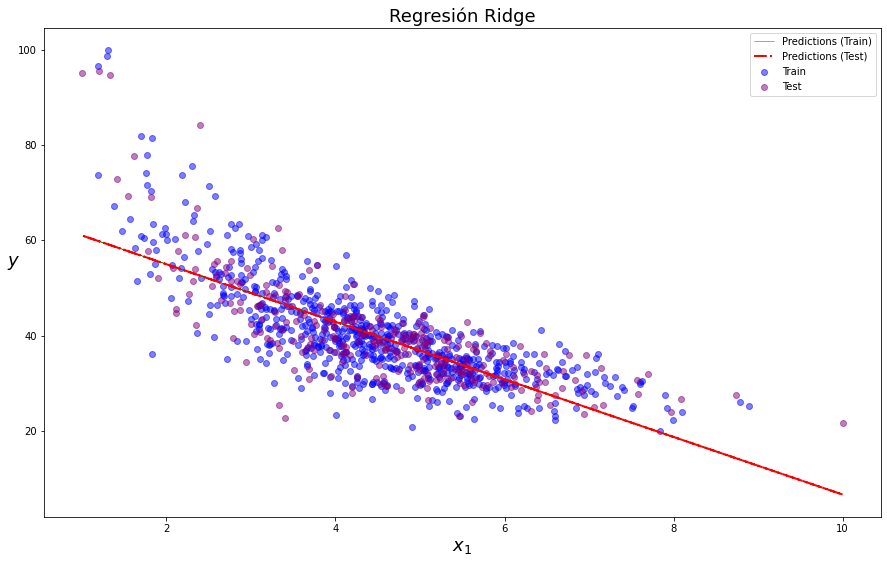

In [137]:
plt.figure (figsize=(15, 9))

plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.5)
plt.plot(X_train, y_hat_train_ridge, color='green', label='Predictions (Train)', linewidth=0.5, linestyle='solid')
plt.plot(X_test, y_hat_test_ridge, color='red', label='Predictions (Test)', linewidth=2, linestyle='dashdot')

plt. legend()

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Ridge", fontsize=18)
plt.show()


##Lasso

##### Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [138]:
grid = GridSearchCV(
    estimator=Lasso(random_state=35),
    param_grid={
      'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    cv=5, 
    n_jobs=-1,
)

res = grid.fit(X_train, y_train)
print ("Best params:", res.best_params_)
print ("Best score:", res.best_score_)

Best params: {'alpha': 0.1}
Best score: 0.581712725749419


In [139]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_hat_train_lasso = lasso_model.predict(X_train)
y_hat_test_lasso = lasso_model.predict(X_test)

print(
  "R2 \t= \tTrain: %.4f\tTest: %.4f" %
  (r2_score(y_train,y_hat_train_lasso), r2_score(y_test, y_hat_test_lasso))
)

print(
  "MSE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_squared_error(y_train,y_hat_train_lasso), mean_squared_error(y_test,y_hat_test_lasso))
)

print(
  "MAE \t= \tTrain: %.4f\tTest: %.4f" %
  (mean_absolute_error(y_train,y_hat_train_lasso), mean_absolute_error(y_test,y_hat_test_lasso))
)



nombres.append('Lasso')
scores_r2.append([
    r2_score(y_train, y_hat_train_lasso),
    r2_score(y_test, y_hat_test_lasso),
])

scores_mae.append([
    mean_absolute_error(y_train, y_hat_train_lasso),
    mean_absolute_error(y_test, y_hat_test_lasso),
])

R2 	= 	Train: 0.5844	Test: 0.5667
MSE 	= 	Train: 45.9776	Test: 50.1113
MAE 	= 	Train: 4.9601	Test: 4.8289


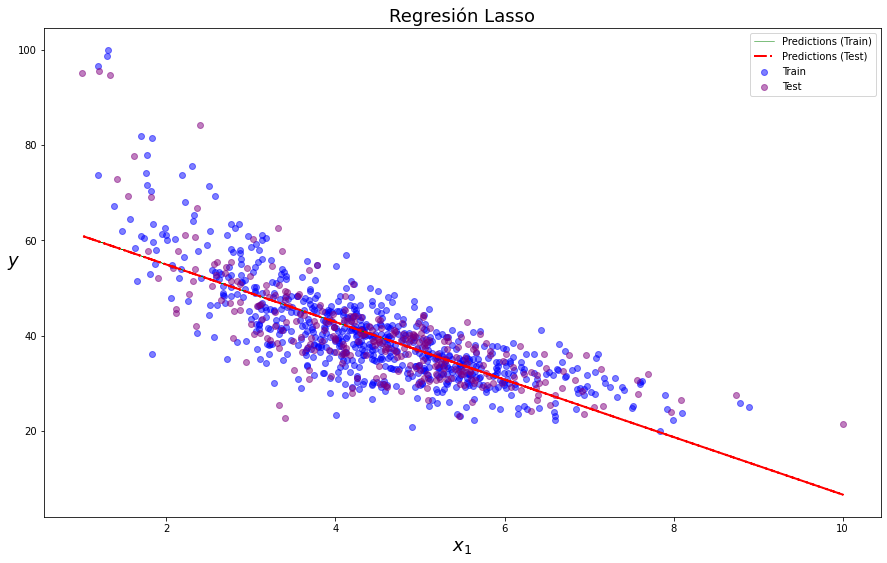

In [140]:
plt.figure (figsize=(15, 9))

plt.scatter(X_train, y_train, label='Train', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', color='purple', alpha=0.5)
plt.plot(X_train, y_hat_train_lasso, color='green', label='Predictions (Train)', linewidth=0.5, linestyle='solid')
plt.plot(X_test, y_hat_test_lasso, color='red', label='Predictions (Test)', linewidth=2, linestyle='dashdot')

plt. legend()

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title ("Regresión Lasso", fontsize=18)
plt.show()

## Graficacion de MAE, R2

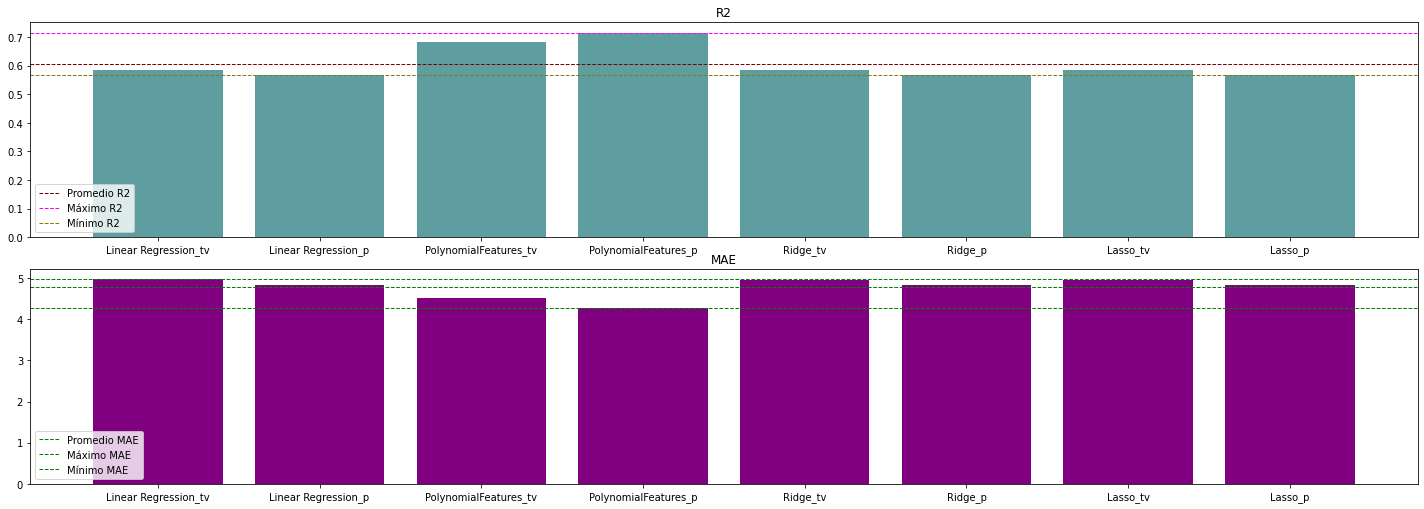

In [141]:
from matplotlib import legend
fig, ax = plt.subplots(2, 1, figsize=(20, 7))
plt.tight_layout()

promedio_r2 = np.mean(scores_r2)
max_r2 = np.max(scores_r2)
min_r2 = np.min(scores_r2)
ax[0].axhline(promedio_r2, color='maroon', linestyle='dashed', linewidth=1, label='Promedio R2')
ax[0].axhline(max_r2, color='magenta', linestyle='dashed', linewidth=1, label='Máximo R2')
ax[0].axhline(min_r2, color='olive', linestyle='dashed', linewidth=1, label='Mínimo R2')

promedio_mae = np.mean(scores_mae)
max_mae = np.max(scores_mae)
min_mae = np.min(scores_mae)
ax[1].axhline(promedio_mae, color='green', linestyle='dashed', linewidth=1, label='Promedio MAE')
ax[1].axhline(max_mae, color='green', linestyle='dashed', linewidth=1, label='Máximo MAE')
ax[1].axhline(min_mae, color='green', linestyle='dashed', linewidth=1, label='Mínimo MAE')

for i, nombre in enumerate(nombres):
  ax[0].set_title('R2')
  ax[0].bar([f'{nombre}_tv', f'{nombre}_p'], scores_r2[i], color='cadetblue')

  ax[1].set_title('MAE')
  ax[1].bar([f'{nombre}_tv', f'{nombre}_p'], scores_mae[i], color='purple')

ax[0].legend()
ax[1].legend()
plt.show()

## Exlica tus resultados


¿Que método conviene más a la empresa, ¿Por que?

De todos los metodos ocupados para le evaluacion del problema de la empresa 
la Regresion polinomial es la mejor ya que se ajusta a los datos de manera mas precisa y
ademas es la que tiene un menor error cuadratico medio.
con un 71.5% de precision comparado con los demas.

¿Que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

El porcentaje de entrenamiento fue de 70% y el de evaluacion de 30%.

Como se puede obsevar en la tabla de abajo. El mejor modelo es el de Regresion Polinomial.


Regresion Lineal:

R2 	  = 	Train: 0.5844	Test: 0.5664
MSE 	= 	Train: 45.9719	Test: 50.1449
MAE 	= 	Train: 4.9660	Test: 4.8379


Regresion Polinomial:

R2 	  = 	Train: 0.6816	Test: 0.7152
MSE 	= 	Train: 35.2207	Test: 32.9418
MAE 	= 	Train: 4.5121	Test: 4.2691

Ridge:
R2 	  = 	Train: 0.5844	Test: 0.5667
MSE 	= 	Train: 45.9754	Test: 50.1176
MAE 	= 	Train: 4.9614	Test: 4.8309

Lasso:
R2 	  = 	Train: 0.5844	Test: 0.5667
MSE 	= 	Train: 45.9776	Test: 50.1113
MAE 	= 	Train: 4.9601	Test: 4.8289


En este ejercicio se realizaron diferentes modelos , Sin embargo aun presentan niveles muy altos de error ,gracias a la ayuda de la regresion se puedo obtener mejores resultados. pero no son los mejores para poder decisiones
dentro de la empresa.








#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [142]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2865,7920100025,20150427T000000,450000.0,2,1.00,740,5100,1.0,0,0,...,7,740,0,1947,0,98115,47.6787,-122.301,920,5100
8177,1257200115,20140521T000000,1003000.0,4,2.75,2290,6120,2.0,0,0,...,7,2170,120,1926,0,98115,47.6746,-122.327,1910,4590
14738,2807100156,20140703T000000,295950.0,2,1.00,1190,6200,1.0,0,0,...,7,1190,0,1948,0,98133,47.7634,-122.340,1470,7800
16772,9523102660,20140513T000000,560000.0,3,1.00,1440,5000,2.0,0,0,...,7,1440,0,1910,0,98103,47.6741,-122.354,1850,4500
10230,8564850200,20150402T000000,594950.0,5,2.50,3280,6553,2.0,0,0,...,9,3280,0,2012,0,98045,47.4750,-121.737,3360,7242
11236,2397101375,20150428T000000,595000.0,2,1.00,980,3600,1.0,0,0,...,6,980,0,1907,0,98119,47.6366,-122.365,1690,3600
20012,8850000018,20141001T000000,412000.0,3,2.50,1200,813,3.0,0,0,...,9,1200,0,2010,0,98144,47.5894,-122.315,1750,4365
20124,2767604074,20140822T000000,437500.0,2,1.50,1210,1232,3.0,0,0,...,8,1210,0,2007,0,98107,47.6712,-122.390,1330,1174
14563,7635801371,20140725T000000,540000.0,4,1.50,2993,19400,2.0,0,0,...,7,2233,760,1921,0,98166,47.4692,-122.365,2060,15100
17985,2141500040,20140912T000000,440000.0,4,2.50,2400,8038,2.0,0,0,...,8,2400,0,2002,0,98059,47.4881,-122.143,2040,7756


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [144]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [145]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


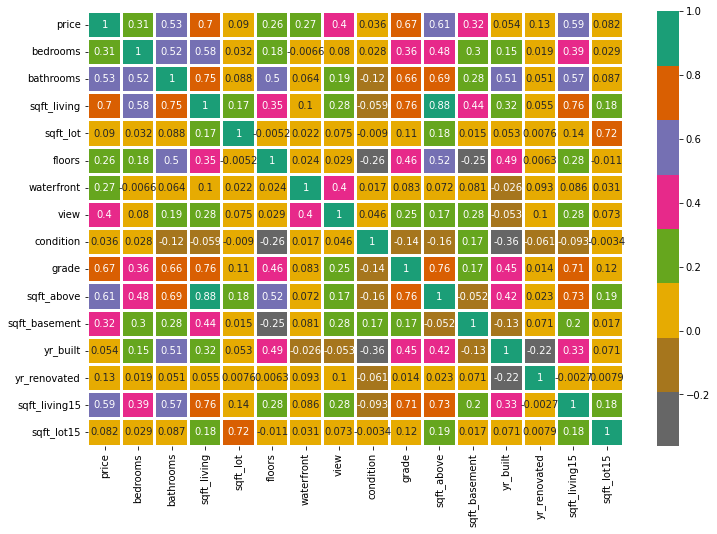

In [146]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [147]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [149]:
#tu codigo aquí